In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [7]:
data = pd.read_csv(r"C:\Users\sn408\OneDrive\Desktop\creditcard.csv")


In [8]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
data.describe ()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [10]:
data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [11]:
 data.shape

(284807, 31)

In [12]:
data.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [13]:
fruad_percentage=data ['Class'].value_counts(normalize=True) [1]*100
print(f"Percentage of Fraudlent Transections:(fruad_percentage:.2f)%")


Percentage of Fraudlent Transections:(fruad_percentage:.2f)%


In [14]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [19]:
data.Amount.describe()


count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

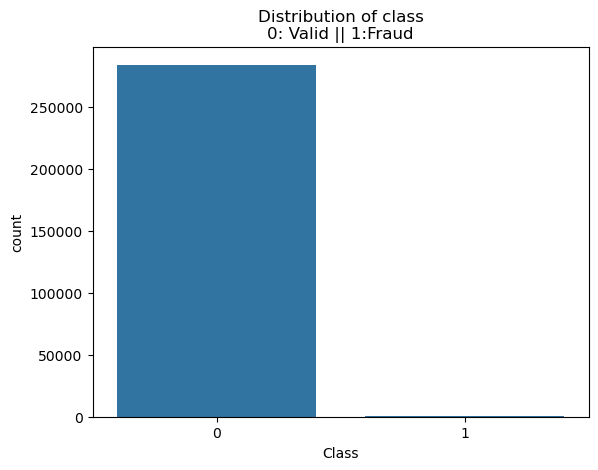

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
#count plot for the 'class' column
sns.countplot(x='Class', data=data)

#adding a title to thr plot
plt.title('Distribution of class\n0: Valid || 1:Fraud')

#display the plot
plt.show()

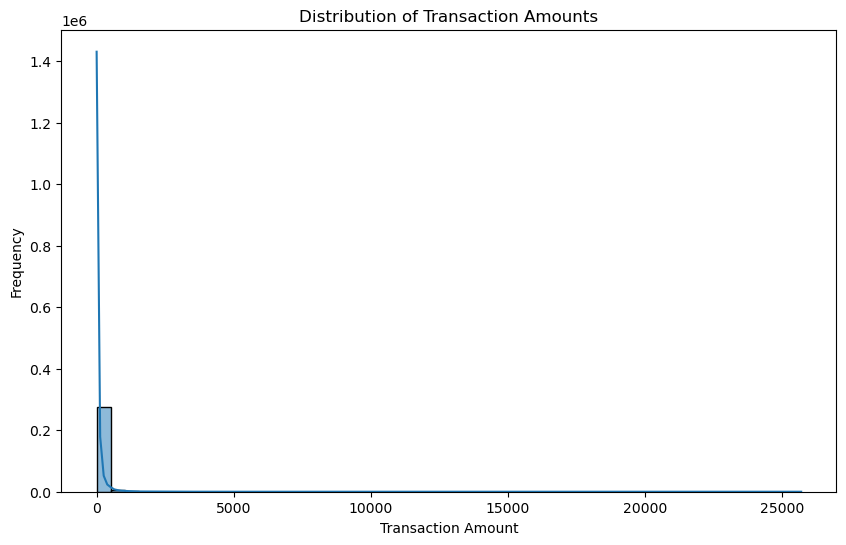

In [25]:
# Plot a histogram for the 'Amount' column
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

In [26]:
corr_matrix=data.corr()
print(corr_matrix)

            Time            V1            V2            V3            V4  \
Time    1.000000  1.173963e-01 -1.059333e-02 -4.196182e-01 -1.052602e-01   
V1      0.117396  1.000000e+00  4.135835e-16 -1.227819e-15 -9.215150e-16   
V2     -0.010593  4.135835e-16  1.000000e+00  3.243764e-16 -1.121065e-15   
V3     -0.419618 -1.227819e-15  3.243764e-16  1.000000e+00  4.711293e-16   
V4     -0.105260 -9.215150e-16 -1.121065e-15  4.711293e-16  1.000000e+00   
V5      0.173072  1.812612e-17  5.157519e-16 -6.539009e-17 -1.719944e-15   
V6     -0.063016 -6.506567e-16  2.787346e-16  1.627627e-15 -7.491959e-16   
V7      0.084714 -1.005191e-15  2.055934e-16  4.895305e-16 -4.104503e-16   
V8     -0.036949 -2.433822e-16 -5.377041e-17 -1.268779e-15  5.697192e-16   
V9     -0.008660 -1.513678e-16  1.978488e-17  5.568367e-16  6.923247e-16   
V10     0.030617  7.388135e-17 -3.991394e-16  1.156587e-15  2.232685e-16   
V11    -0.247689  2.125498e-16  1.975426e-16  1.576830e-15  3.459380e-16   
V12     0.12

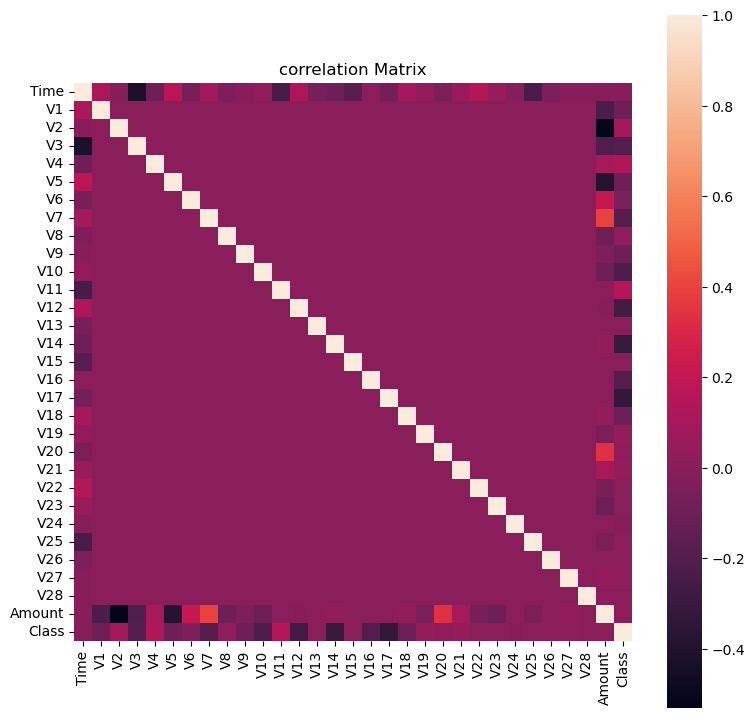

In [27]:
fig=plt.figure(figsize=(9,9))
sns.heatmap(corr_matrix, square=True)
plt.title('correlation Matrix')
plt.show()

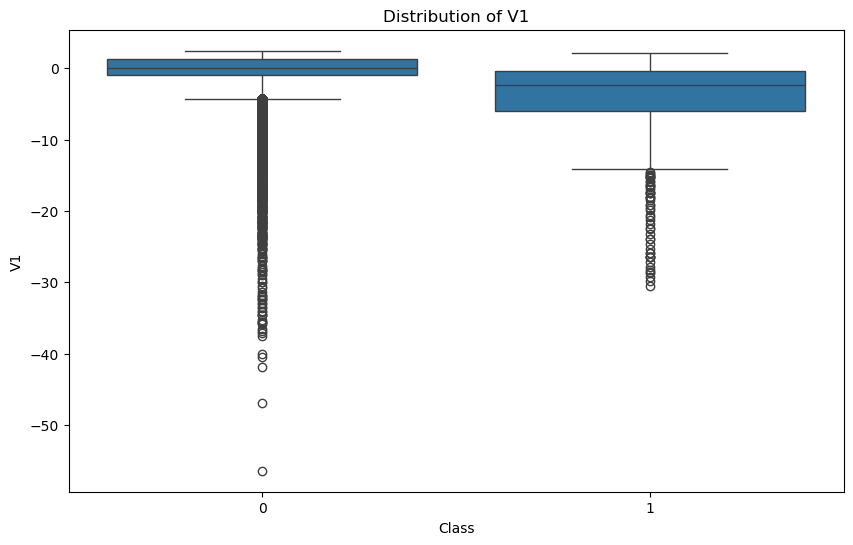

Outliers in V1 for fraudulent transactions:
6108     -4.397974
6882     -4.617217
8842     -4.696795
8845     -4.727713
9252     -5.454362
            ...   
249607   -7.381547
258403   -5.976119
268375   -5.238808
272521   -7.503926
274382   -5.766879
Name: V1, Length: 174, dtype: float64
Outliers in V1 for valid transactions:
18        -5.401258
85        -4.575093
140       -5.101877
146       -5.285971
164       -6.093248
            ...    
284631    -5.459612
284649   -11.946976
284772    -6.713826
284795   -12.516732
284802   -11.881118
Name: V1, Length: 6912, dtype: float64


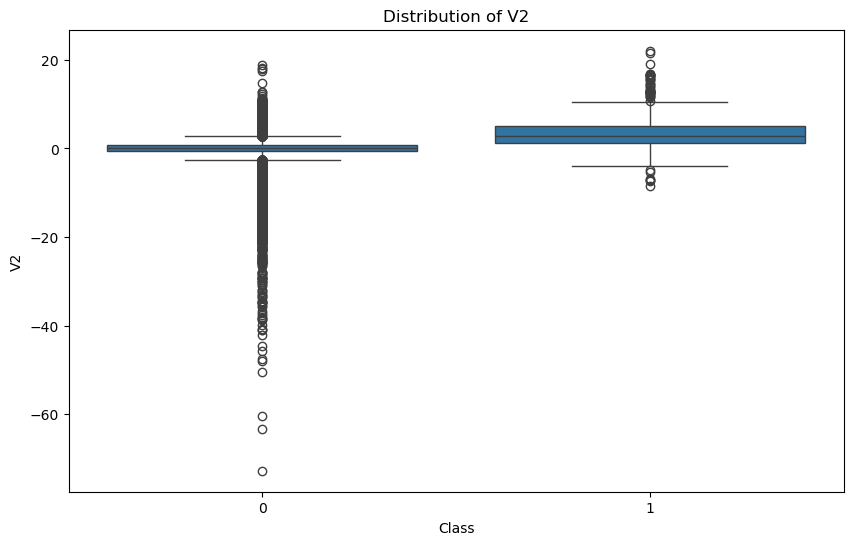

Outliers in V2 for fraudulent transactions:
623      -3.157307
6329      3.019740
6331      4.137837
6334      4.132464
6336      3.712889
            ...   
262560    3.309385
262826    4.700055
263274    5.002352
263877    3.977881
274382   -8.402154
Name: V2, Length: 247, dtype: float64
Outliers in V2 for valid transactions:
18        -5.450148
85        -4.429184
89        -4.146007
146        4.847323
164      -12.114213
            ...    
284727    -2.799345
284728     3.216851
284732    -3.116353
284795    10.187818
284802    10.071785
Name: V2, Length: 13327, dtype: float64


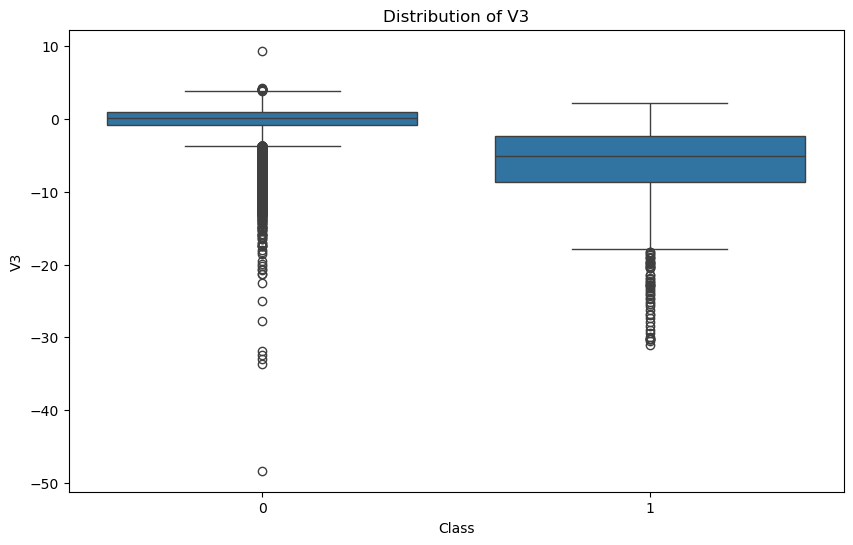

Outliers in V3 for fraudulent transactions:
6329     -4.304597
6331     -6.240697
6334     -6.560600
6336     -5.775935
6338     -5.615159
            ...   
272521   -3.830952
276864   -4.346572
279863   -4.518331
280143   -5.004247
281144   -5.399730
Name: V3, Length: 312, dtype: float64
Outliers in V3 for valid transactions:
164       -5.694973
958        4.017561
1632     -12.389545
4023       4.101716
5257      -4.075931
            ...    
284610    -5.138427
284631    -5.127471
284649    -8.006237
284795    -8.476671
284802    -9.834783
Name: V3, Length: 3095, dtype: float64


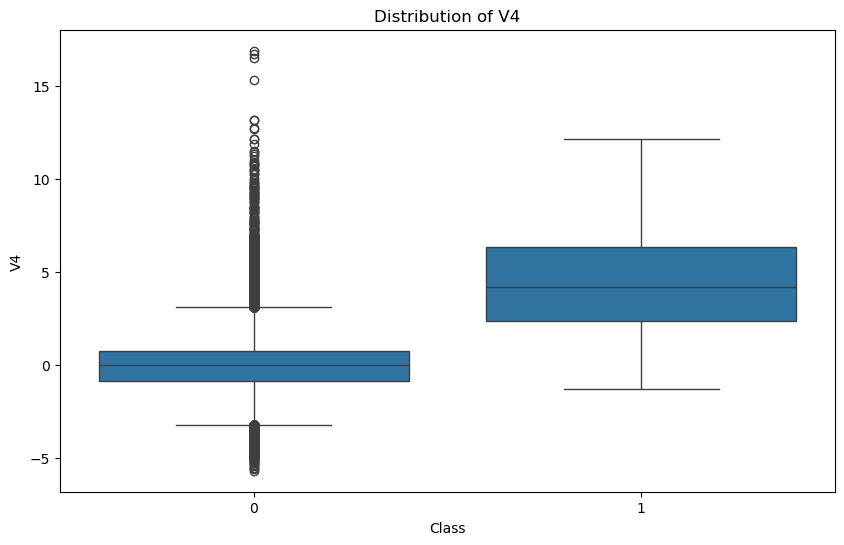

Outliers in V4 for fraudulent transactions:
541       3.997906
6329      4.732795
6331      6.675732
6334      6.348557
6336      6.078266
            ...   
261056    5.803893
262560    6.394574
262826    7.671884
263274    7.756915
274382    6.950983
Name: V4, Length: 321, dtype: float64
Outliers in V4 for valid transactions:
51        3.710061
83       -4.515824
98        3.145414
116       3.481486
164       3.294389
            ...   
284745    3.948933
284746   -3.262816
284758    4.148798
284774   -3.779860
284782    4.846661
Name: V4, Length: 10918, dtype: float64


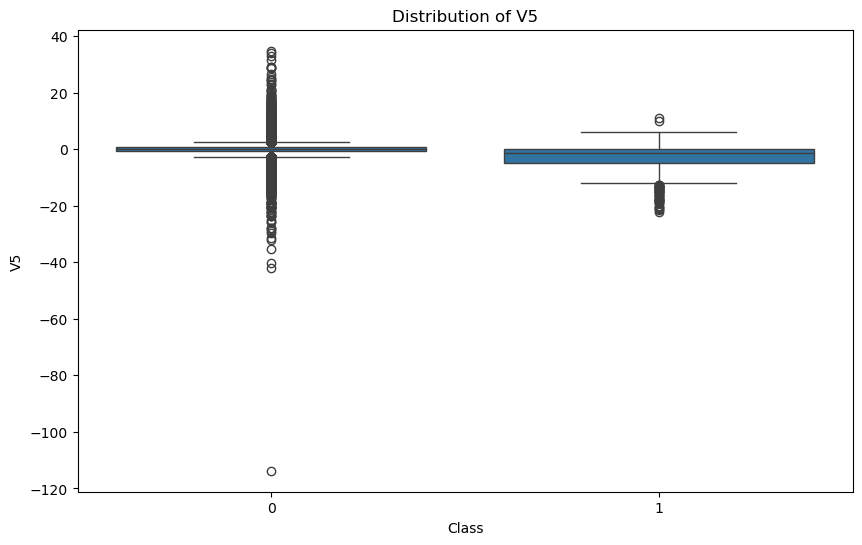

Outliers in V5 for fraudulent transactions:
6329      3.624201
6971     -6.974522
8335     -4.749527
9035     -2.954461
9179     -5.759924
            ...   
247673   -4.011781
249607    6.198304
258403    4.676533
263324   -3.301910
274382    9.880564
Name: V5, Length: 208, dtype: float64
Outliers in V5 for valid transactions:
8         2.669599
11        2.924584
18        3.049106
24        2.941968
51       -6.631951
            ...   
284784    2.833960
284785    2.932315
284795   -4.586669
284802   -5.364473
284804    2.630515
Name: V5, Length: 12124, dtype: float64


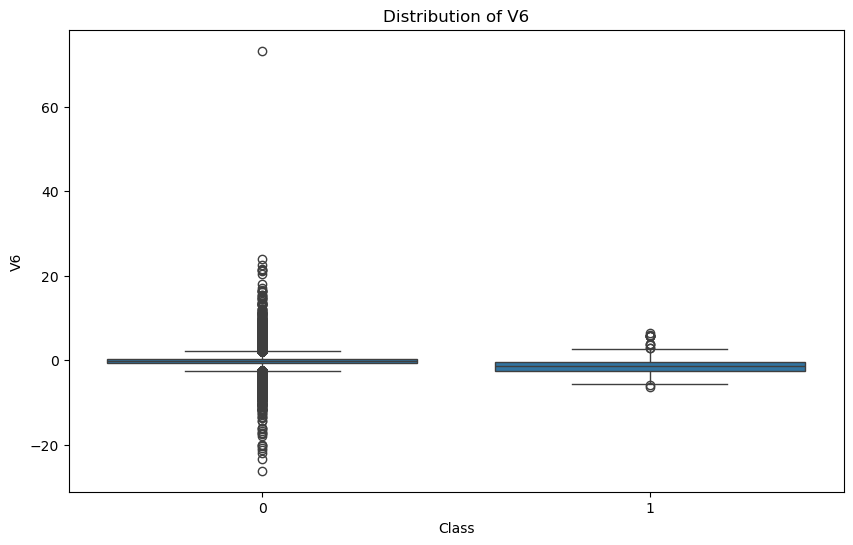

Outliers in V6 for fraudulent transactions:
6331     -3.353060
6338     -2.651353
6446     -2.667554
6609     -2.731689
6641     -2.730762
            ...   
262826   -2.646693
263274   -2.751496
263877   -3.599487
274382   -5.773192
281144   -2.943548
Name: V6, Length: 137, dtype: float64
Outliers in V6 for valid transactions:
8         3.721818
11        3.317027
24        2.955053
40        3.692977
51        5.122103
            ...   
284787   -2.956733
284793    3.911336
284799    5.519980
284802   -2.606837
284804    3.031260
Name: V6, Length: 22829, dtype: float64


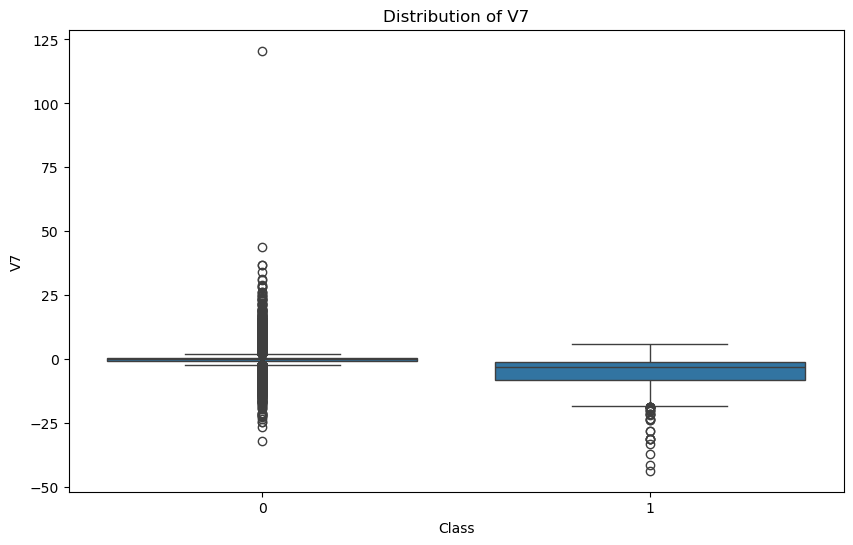

Outliers in V7 for fraudulent transactions:
541      -2.537387
6108     -3.496197
6427     -3.968593
6446     -3.878088
6472     -3.059245
            ...   
263877   -3.686651
268375   -4.276132
272521   -6.783964
274382   -5.748879
275992    3.790880
Name: V7, Length: 301, dtype: float64
Outliers in V7 for valid transactions:
51        4.371691
85       -2.705393
140       3.329603
150       3.315254
164       4.808426
            ...   
284649   -3.259766
284698    2.671779
284733    3.009433
284795   -3.632516
284802   -4.918215
Name: V7, Length: 8668, dtype: float64


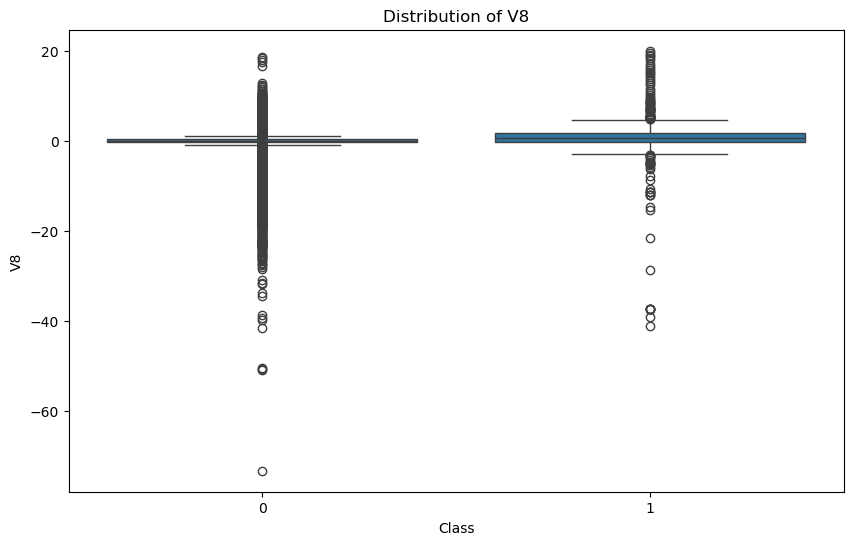

Outliers in V8 for fraudulent transactions:
541        1.391657
6529       1.515607
6609       1.413204
6734       1.202270
6774       1.249803
            ...    
263877     1.942252
272521   -15.415385
275992    -1.155595
276864    -2.149930
280149     1.210158
Name: V8, Length: 248, dtype: float64
Outliers in V8 for valid transactions:
7        -3.807864
14       -1.907107
23       -1.617935
41        1.530817
51       -2.006868
            ...   
284784    1.282746
284789   -1.042610
284795    5.498583
284799    2.080825
284802    7.305334
Name: V8, Length: 23974, dtype: float64


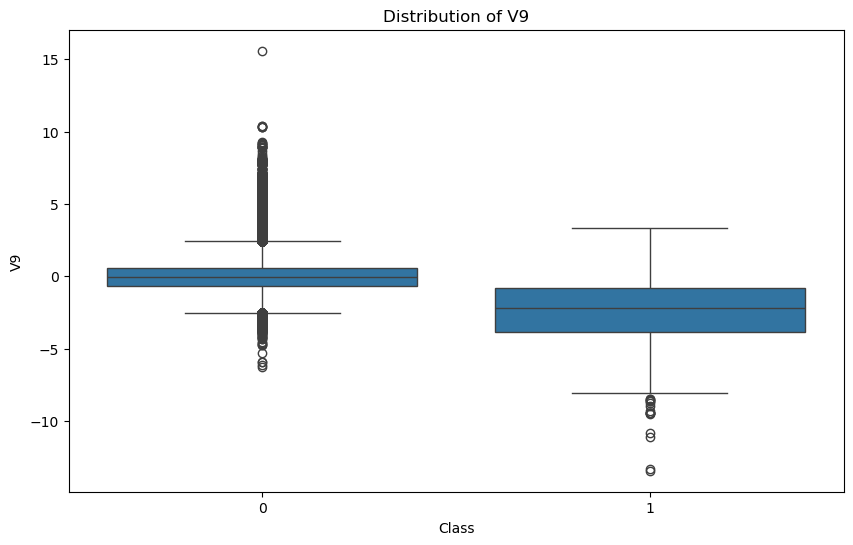

Outliers in V9 for fraudulent transactions:
541      -2.770089
6331     -2.795892
6334     -3.139409
6338     -2.678679
6717     -3.796354
            ...   
262826   -4.588536
263274   -4.403852
263324   -2.548788
263877   -3.065089
268375   -2.971644
Name: V9, Length: 224, dtype: float64
Outliers in V9 for valid transactions:
82        4.009259
146       3.558373
225       4.324752
290       3.580112
321      -2.517037
            ...   
284645   -2.625264
284649    4.870093
284713    2.705118
284774   -3.159994
284795    4.893089
Name: V9, Length: 8090, dtype: float64


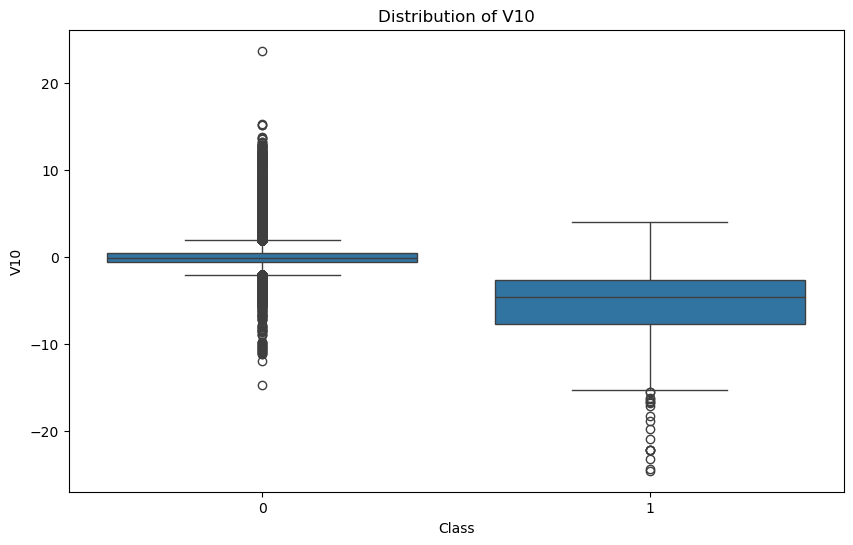

Outliers in V10 for fraudulent transactions:
541      -2.772272
6108     -4.801637
6329     -2.447469
6331     -6.187891
6334     -6.045468
            ...   
276864   -4.390842
279863   -5.587794
280143   -3.232153
280149   -3.463891
281144   -5.245984
Name: V10, Length: 399, dtype: float64
Outliers in V10 for valid transactions:
82        6.051521
132       3.014355
146       6.427802
190       3.351079
225       6.286487
            ...   
284742   -2.518802
284765    3.714089
284772    2.769699
284795    8.655320
284802    4.356170
Name: V10, Length: 9128, dtype: float64


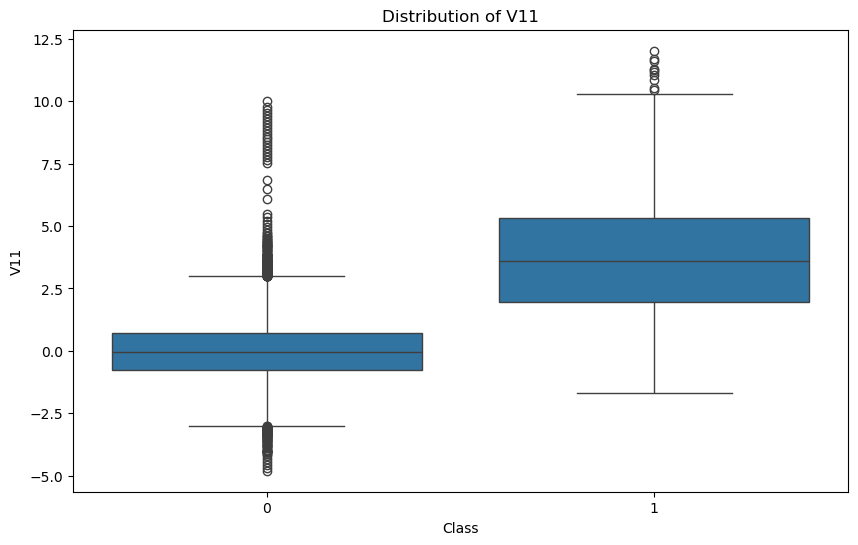

Outliers in V11 for fraudulent transactions:
541       3.202033
6108      4.895844
6331      5.664395
6334      6.754625
6336      4.560720
            ...   
255556    4.469467
262560    3.618737
262826    4.548495
263274    4.475905
263877    2.989626
Name: V11, Length: 295, dtype: float64
Outliers in V11 for valid transactions:
1632      3.702177
2696      3.344171
2905      3.050256
4025      3.378338
4052      3.280207
            ...   
282863   -3.712310
282881   -3.837486
282903   -3.962664
282919   -3.610426
282998   -3.767965
Name: V11, Length: 492, dtype: float64


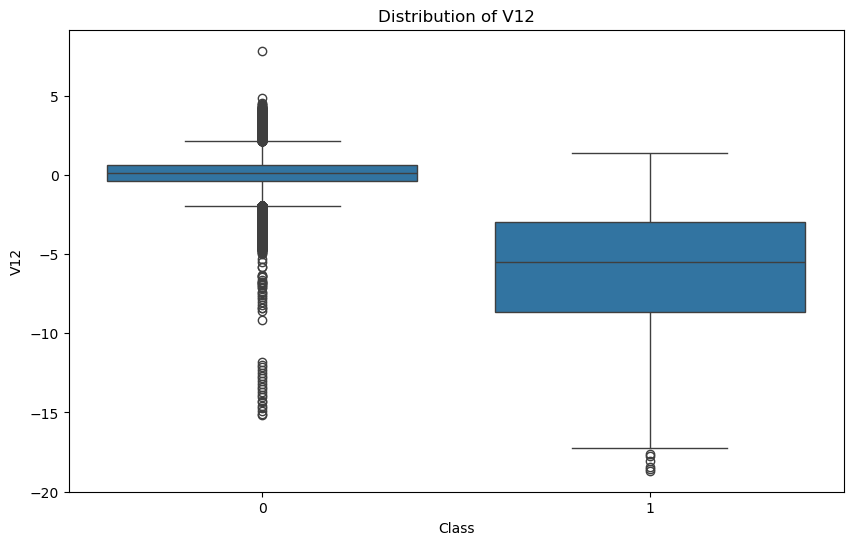

Outliers in V12 for fraudulent transactions:
541       -2.899907
4920      -6.560124
6108     -10.912819
6329      -4.609628
6331      -9.854485
            ...    
276864    -3.910522
279863    -5.417424
280143    -3.096915
280149    -2.775022
281144    -5.030465
Name: V12, Length: 409, dtype: float64
Outliers in V12 for valid transactions:
212       2.152055
460      -2.149863
472      -2.361050
1388     -1.981435
1815      2.313066
            ...   
284561    2.219485
284649    2.663531
284746   -2.416478
284795    2.834865
284802    2.711941
Name: V12, Length: 15054, dtype: float64


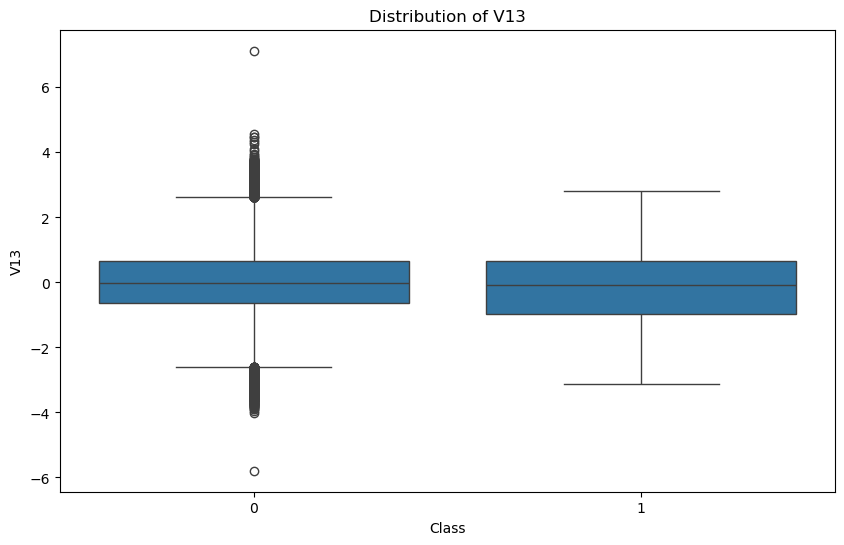

Outliers in V13 for fraudulent transactions:
18773    -2.648076
79525    -3.127795
154371   -2.657496
154587   -3.076318
154684   -3.008255
154697    2.793140
154719    2.733085
154720    2.815440
Name: V13, dtype: float64
Outliers in V13 for valid transactions:
343      -2.656601
1182      3.182541
1185      3.078366
1287     -2.847787
1401      3.099578
            ...   
284349   -2.920747
284359   -2.892497
284650   -3.081210
284726   -2.910623
284745   -2.898543
Name: V13, Length: 3365, dtype: float64


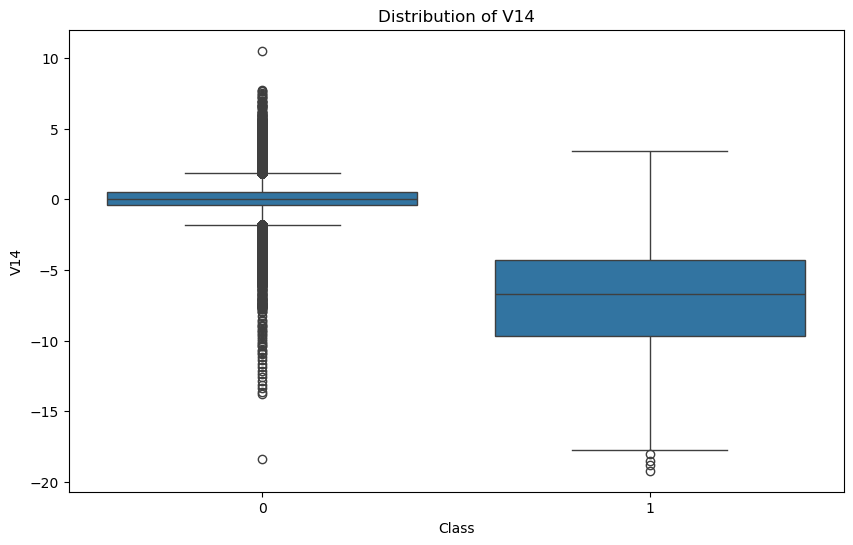

Outliers in V14 for fraudulent transactions:
541       -4.289254
6108      -6.771097
6329      -6.079337
6331     -10.691196
6334     -10.733854
            ...    
279863    -6.665177
280143    -5.210141
280149    -4.057162
281144    -6.416628
281674    -1.948883
Name: V14, Length: 430, dtype: float64
Outliers in V14 for valid transactions:
82       -2.837136
102      -4.318378
104      -2.678081
108      -3.279054
146      -1.860653
            ...   
284669   -2.491123
284721   -2.276737
284758   -2.591114
284782   -1.820716
284802    4.626942
Name: V14, Length: 13800, dtype: float64


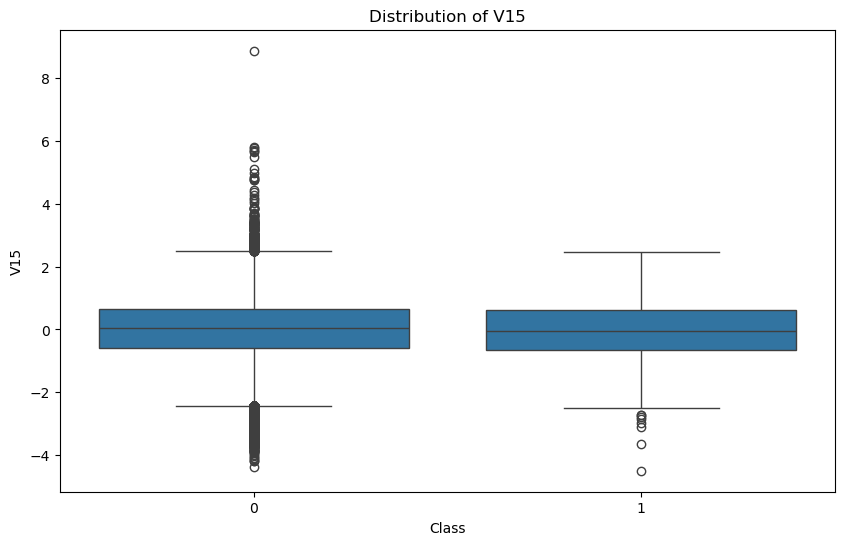

Outliers in V15 for fraudulent transactions:
150677   -2.447576
150678   -2.447576
150692   -2.502554
151103   -2.720077
153823   -2.992430
153835   -2.720329
154234   -3.098805
154371   -4.498945
154587   -2.836677
154668   -2.799076
154676   -3.642393
223572   -2.459556
Name: V15, dtype: float64
Outliers in V15 for valid transactions:
180      -2.431499
218      -3.618060
238      -2.534978
306      -2.750145
370      -2.594957
            ...   
284534   -2.699893
284542   -2.611365
284569   -2.509606
284641    2.546263
284770   -2.585488
Name: V15, Length: 2883, dtype: float64


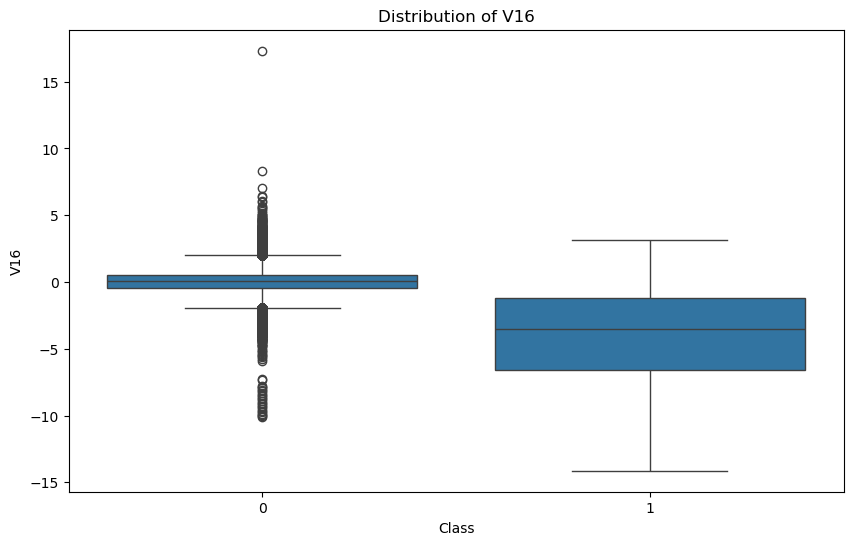

Outliers in V16 for fraudulent transactions:
4920     -2.282194
6108     -7.358083
6329      2.581851
6331     -2.041974
6427     -3.599540
            ...   
274475   -2.015713
276864   -2.077066
279863   -2.897825
280143   -2.155297
281144   -2.549498
Name: V16, Length: 352, dtype: float64
Outliers in V16 for valid transactions:
2        -2.890083
20       -2.044557
83       -2.811888
171      -2.444885
172      -2.627095
            ...   
284567   -2.231099
284576    2.330882
284605   -2.725711
284634   -2.226914
284677   -2.602805
Name: V16, Length: 7908, dtype: float64


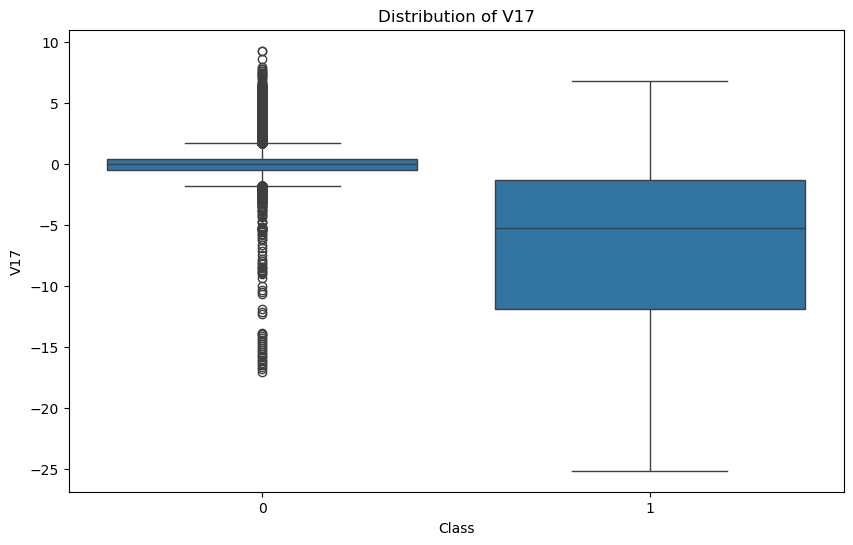

Outliers in V17 for fraudulent transactions:
541       -2.830056
4920      -4.781831
6108     -12.598419
6329       6.739384
6427      -4.830324
            ...    
276864    -2.683521
279863    -4.570529
280143    -3.267116
280149    -5.035326
281144    -4.614717
Name: V17, Length: 397, dtype: float64
Outliers in V17 for valid transactions:
82       -1.942303
102       2.729168
108       2.698337
119       1.780961
134       1.915146
            ...   
284633    2.142859
284638    1.743624
284719    2.350764
284782    2.322135
284802    1.991691
Name: V17, Length: 7038, dtype: float64


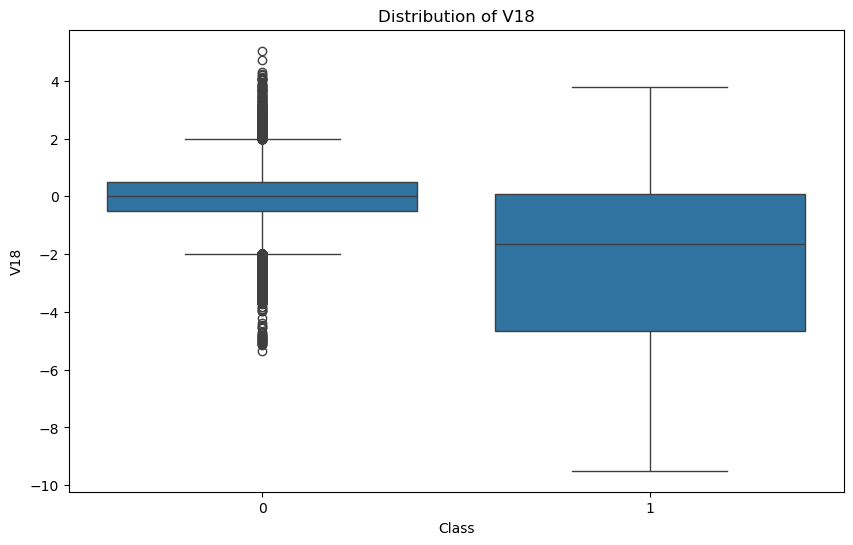

Outliers in V18 for fraudulent transactions:
4920     -2.615665
6108     -5.131549
6329      3.042493
6882     -4.120629
8296     -5.494928
            ...   
247673   -2.651539
251866   -2.584028
255556    2.132081
263324   -3.705070
268375   -4.897766
Name: V18, Length: 237, dtype: float64
Outliers in V18 for valid transactions:
38       -2.830035
68       -2.119314
96       -2.514235
112      -2.449500
113      -2.449500
            ...   
284535    2.344075
284536    2.620219
284625   -2.213708
284731    2.281660
284735   -2.685819
Name: V18, Length: 7345, dtype: float64


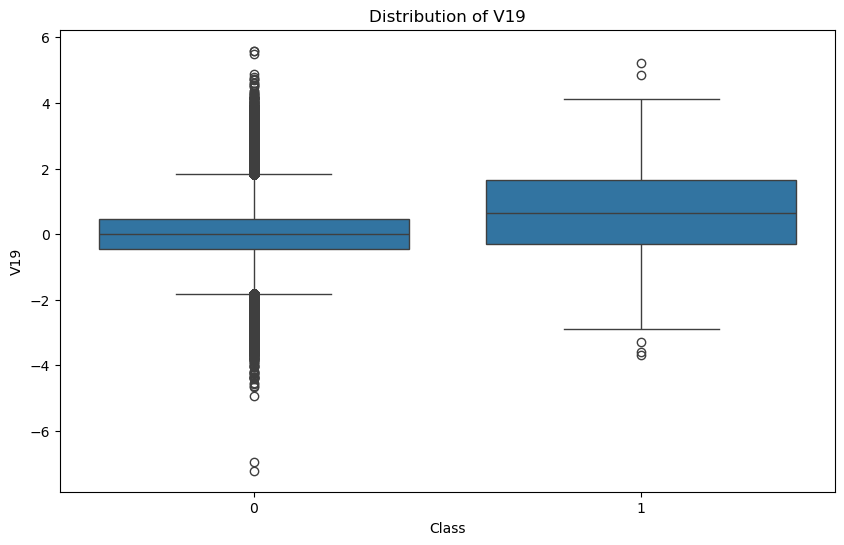

Outliers in V19 for fraudulent transactions:
6329     -2.721853
6331     -1.934666
6336     -2.370599
6427      2.250123
6717     -2.071450
            ...   
243393    2.995245
251904    3.057382
252124   -2.097385
263324    3.531003
272521    2.548313
Name: V19, Length: 135, dtype: float64
Outliers in V19 for valid transactions:
2        -2.261857
14        2.221868
21       -2.027612
23        2.177807
69        1.890364
            ...   
284693   -1.835802
284725    2.621186
284766   -2.767283
284798    2.894952
284805    2.897849
Name: V19, Length: 10131, dtype: float64


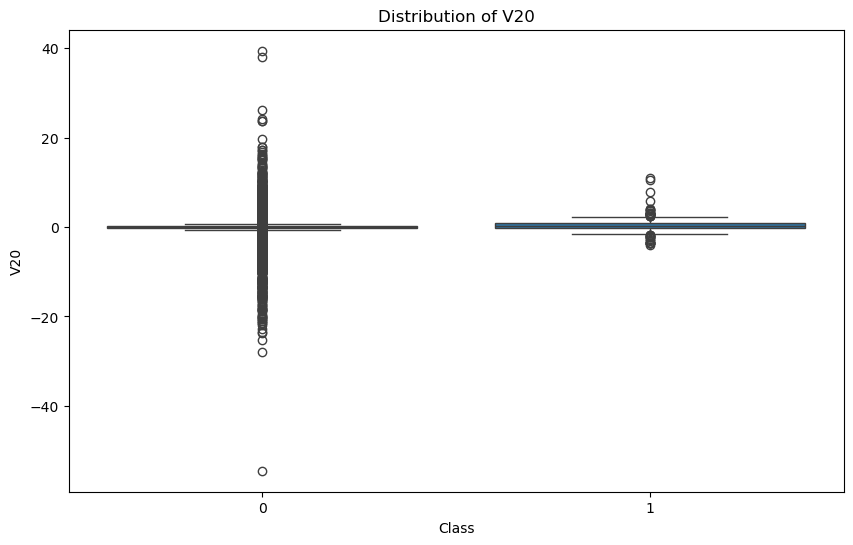

Outliers in V20 for fraudulent transactions:
623       2.102339
6971     -3.042626
8296      1.493775
8335      1.410678
8615      1.382619
            ...   
262826    0.832035
263274    0.816558
274382    2.493224
276864    0.650196
279863    1.252967
Name: V20, Length: 194, dtype: float64
Outliers in V20 for valid transactions:
14       -1.582122
18       -2.196848
74        0.667847
82        2.456724
83       -0.769854
            ...   
284765    1.510480
284772   -1.002096
284776    0.751710
284795    3.490065
284802    1.475829
Name: V20, Length: 27649, dtype: float64


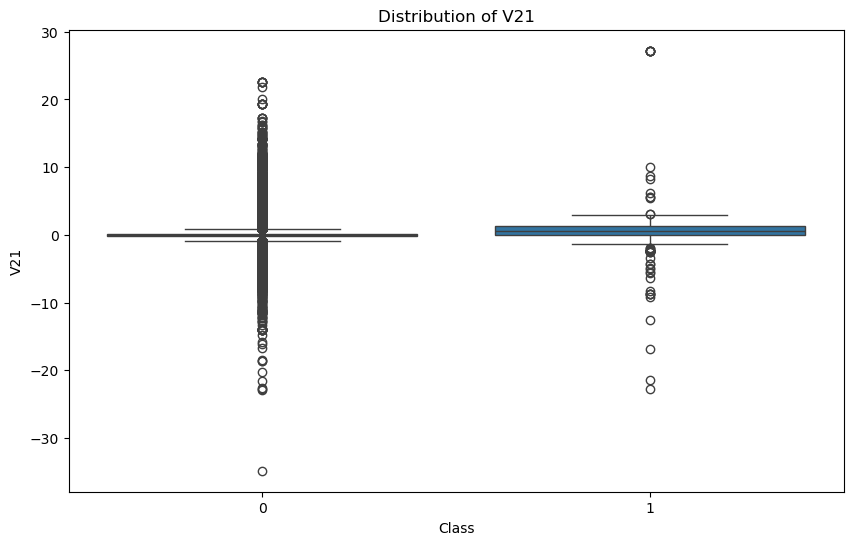

Outliers in V21 for fraudulent transactions:
6971     -1.052368
8296      1.646518
8335      1.865679
8615      1.757085
8972      1.688665
            ...   
263324    1.125229
263877    1.043587
272521   -6.389132
274382    0.880395
276864   -0.870779
Name: V21, Length: 244, dtype: float64
Outliers in V21 for valid transactions:
7         1.943465
14        1.151663
23        1.650180
51        1.393406
82       -0.852309
            ...   
284735    1.432397
284742   -2.704489
284786    2.016666
284789    0.851800
284795   -0.944759
Name: V21, Length: 14273, dtype: float64


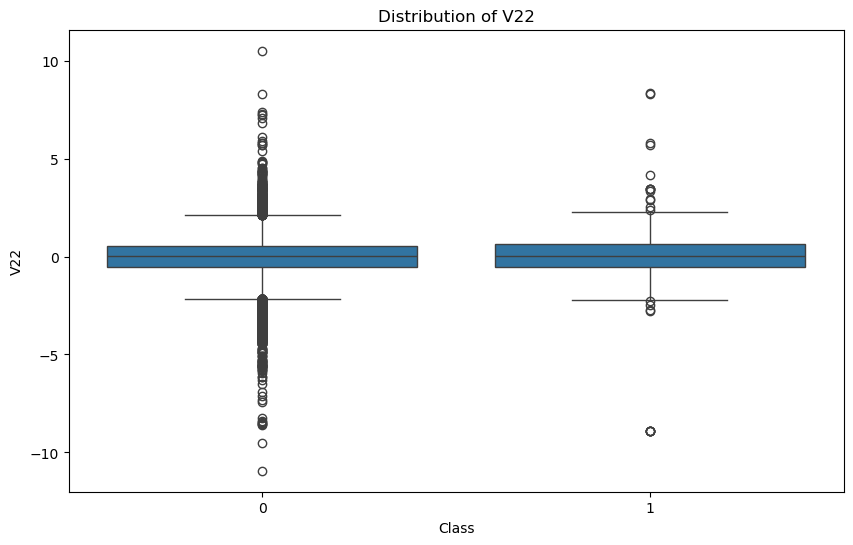

Outliers in V22 for fraudulent transactions:
17407    -2.175815
17453    -2.232252
17480    -2.288686
102441   -8.887017
102442   -8.887017
102443   -8.887017
102444   -8.887017
102445   -8.887017
102446   -8.887017
149145   -2.454964
149600   -2.797150
151006    3.460893
151007    3.460893
151008    3.460893
151009    3.460893
151807    2.510980
152019    2.941475
152223    2.865772
152295    2.389041
153823    3.318178
153835    4.158895
154234    5.774087
154371    5.703684
154587    8.361985
154684    8.316275
189878   -2.716383
214775    2.151787
272521    2.249964
Name: V22, dtype: float64
Outliers in V22 for valid transactions:
160      -2.776923
164      -2.264037
417      -2.331390
2061     -2.491575
2114     -3.138177
            ...   
282578   -3.059282
282696    2.529704
282859   -2.236875
283183   -2.833353
283352   -2.949849
Name: V22, Length: 1289, dtype: float64


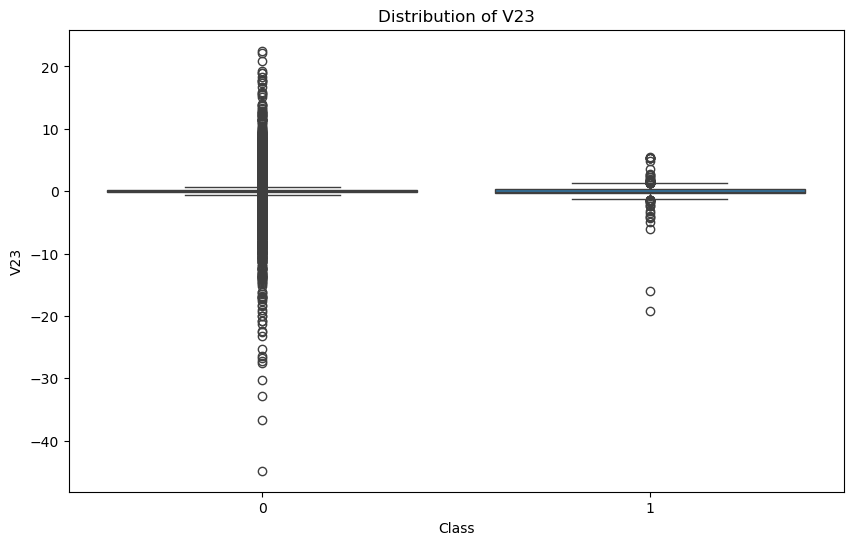

Outliers in V23 for fraudulent transactions:
623       1.375966
6329     -0.656805
6334     -0.669605
6446      0.721698
6472      0.709654
            ...   
249239   -0.921017
258403    0.848177
272521    1.670508
274382    2.241471
279863    0.639419
Name: V23, Length: 149, dtype: float64
Outliers in V23 for valid transactions:
2         0.909412
14        1.020586
18        2.458589
24        0.870300
25        0.742435
            ...   
284698    0.862395
284712   -0.716836
284716    0.659969
284795    0.890675
284802    1.014480
Name: V23, Length: 18411, dtype: float64


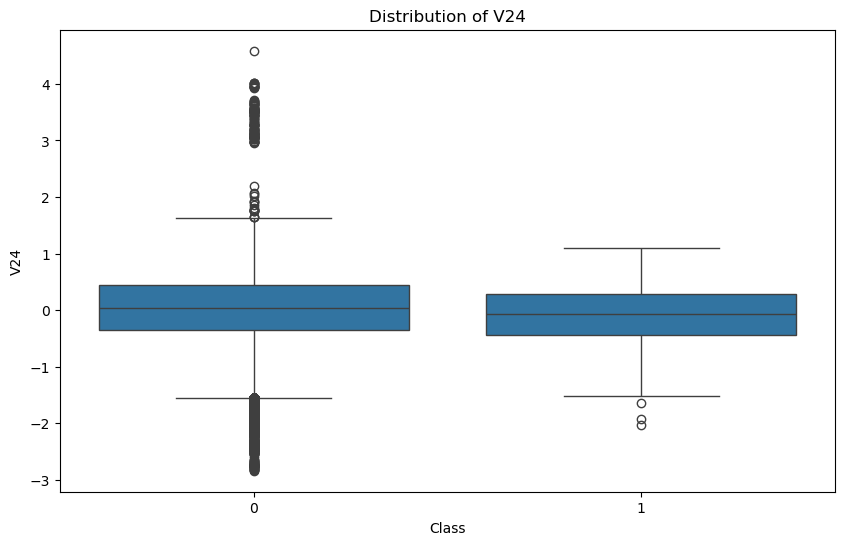

Outliers in V24 for fraudulent transactions:
6329     -1.632653
214662   -1.929717
215132   -2.028024
Name: V24, dtype: float64
Outliers in V24 for valid transactions:
183      -1.688158
218      -1.735297
220      -1.724222
221      -1.724222
222      -1.724175
            ...   
284145   -1.659359
284522   -1.584783
284553   -1.638714
284565   -1.666391
284677   -1.612247
Name: V24, Length: 4771, dtype: float64


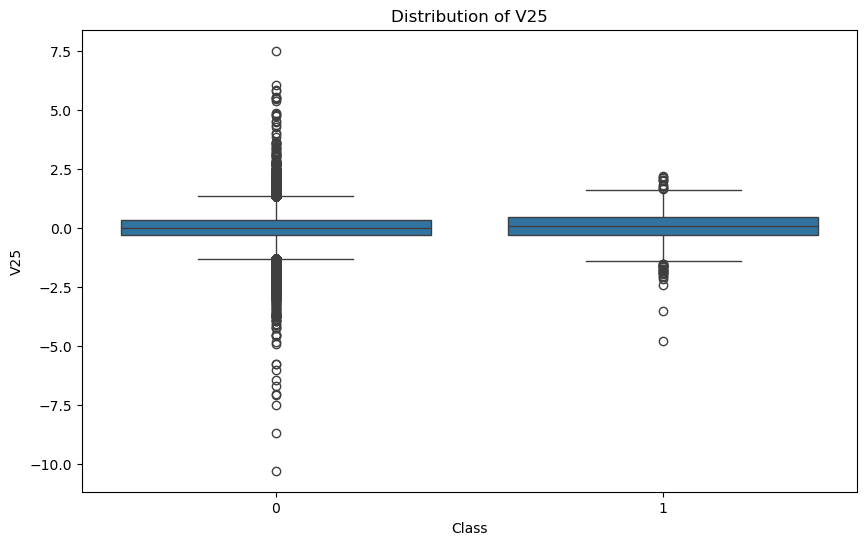

Outliers in V25 for fraudulent transactions:
6329      1.488901
6331      1.488481
6334      1.605056
6336      1.415717
6338      1.474753
6427     -1.843078
6446     -1.959304
6472     -2.032068
6719      1.539916
6734     -1.911034
6774     -1.908217
8296      1.701796
8312      1.568445
8335     -1.746337
9179     -1.646815
10630    -1.617043
10690    -4.781606
10891    -1.610741
15451     1.402587
15476     1.454857
15506     1.507110
15539     1.559350
15566     1.611577
15736     1.663792
15751     1.715997
15781     1.768192
15810     1.820378
16780     2.024388
17317     1.999499
17366     2.051687
17407     2.103868
17453     2.156042
17480     2.208209
18773     1.378210
18809    -1.815638
41943     1.364225
43428    -1.413700
80760    -2.079928
149145   -1.531380
150687   -1.602389
150697   -1.415639
151011   -1.413417
151462   -2.167510
154234   -1.608804
154286   -3.536716
154587   -1.508739
154684   -1.527145
154697   -1.829169
197586    1.408392
198868   -2.419446
20332

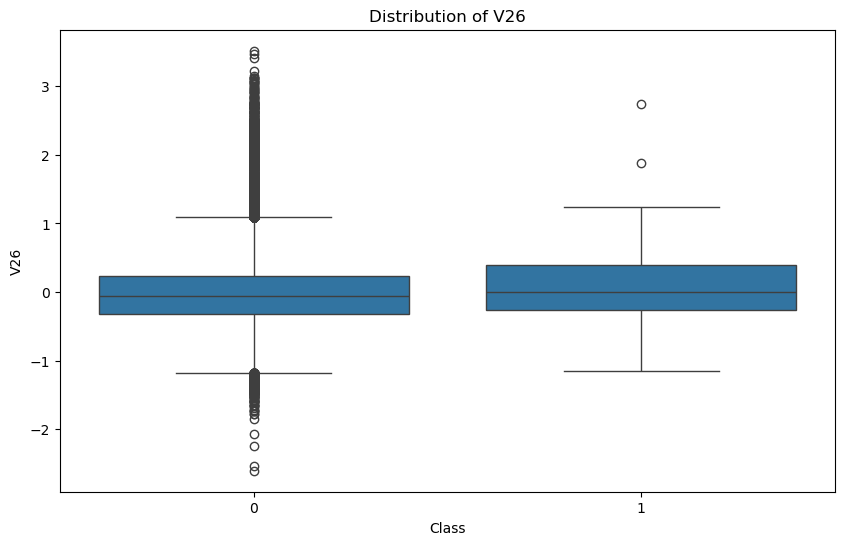

Outliers in V26 for fraudulent transactions:
86155     1.179242
95534     1.246604
141257    1.165784
141258    1.165784
141259    1.111151
141260    1.111151
157868    1.095671
191267    2.745261
247673    1.884741
272521    1.207731
Name: V26, dtype: float64
Outliers in V26 for valid transactions:
40        1.196549
48        1.194928
61        1.141241
69        3.065576
83       -1.243924
            ...   
284641    1.431423
284648   -1.420358
284688    2.587527
284770    2.372675
284787    1.138216
Name: V26, Length: 5603, dtype: float64


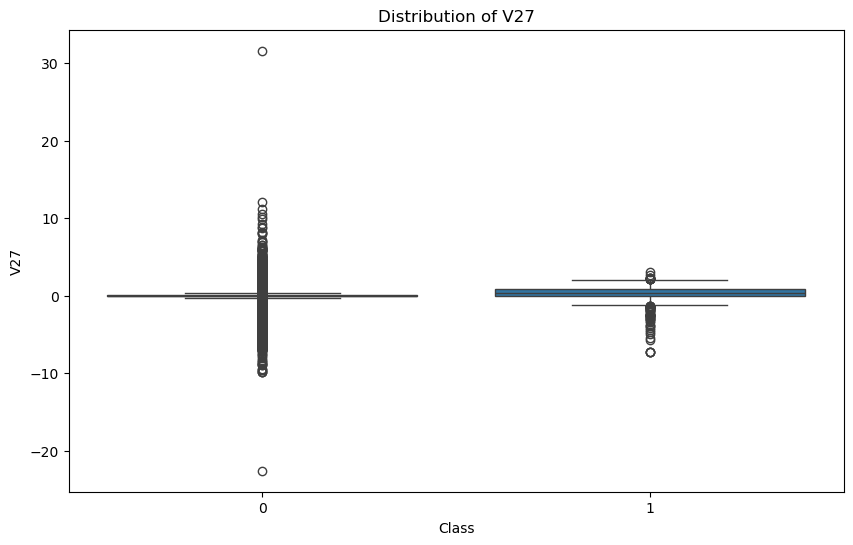

Outliers in V27 for fraudulent transactions:
6108     -0.827136
6331      0.735822
6334      0.737040
6336      0.530507
6338      0.518868
            ...   
275992    0.508712
276864    0.454982
280143    0.389152
280149    0.385107
281144    0.884876
Name: V27, Length: 344, dtype: float64
Outliers in V27 for valid transactions:
7        -1.206921
18        0.392053
23        0.336634
24        0.707519
25        0.359969
            ...   
284786    0.438657
284789    0.503092
284795    2.090712
284799    0.454379
284802    0.943651
Name: V27, Length: 39018, dtype: float64


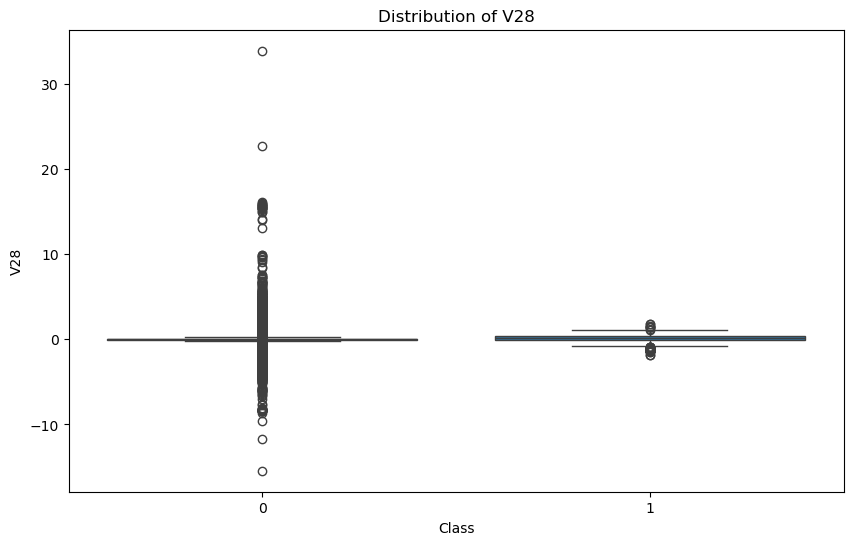

Outliers in V28 for fraudulent transactions:
6108      0.849573
6331      0.513574
6334      0.496699
6336      0.404474
6338      0.402528
            ...   
263877    0.287592
268375   -0.964482
274382    0.583799
274475    0.443299
281144   -0.253700
Name: V28, Length: 272, dtype: float64
Outliers in V28 for valid transactions:
7        -1.085339
18        0.949594
64        0.316910
66       -0.473218
67       -0.272463
            ...   
284760    0.281084
284769   -0.255729
284772    0.474584
284795    1.232864
284802    0.823731
Name: V28, Length: 30206, dtype: float64


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Define feature columns
feature_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
                   'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 
                   'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']

# Loop through each column to analyze distributions and outliers
for column in feature_columns:
    # Plot the distribution of the column for each class
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Class', y=column, data=data)
    plt.title(f"Distribution of {column}")
    plt.show()

    # Extracting fraud and valid data
    fraud_data = data[data['Class'] == 1][column]
    valid_data = data[data['Class'] == 0][column]

    # Calculate the 25th and 75th percentiles for valid transactions
    valid_25th = valid_data.quantile(0.25)
    valid_75th = valid_data.quantile(0.75)

    # Calculate lower and upper thresholds for outlier detection
    lower_threshold = valid_25th - 1.5 * (valid_75th - valid_25th)
    upper_threshold = valid_75th + 1.5 * (valid_75th - valid_25th)

    # Find outliers
    fraud_outliers = fraud_data[(fraud_data < lower_threshold) | (fraud_data > upper_threshold)]
    valid_outliers = valid_data[(valid_data < lower_threshold) | (valid_data > upper_threshold)]

    # Print the outliers
    print(f"Outliers in {column} for fraudulent transactions:")
    print(fraud_outliers)

    print(f"Outliers in {column} for valid transactions:")
    print(valid_outliers)

In [32]:
import pandas as pd
from scipy import stats

# Assuming 'df' is your DataFrame and 'Class' is the target variable
target_variable = 'Class'
feature_columns = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 
                   'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 
                   'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 
                   'V25', 'V26', 'V27', 'V28']

# Create separate DataFrames for fraud and valid cases
fraud_cases = data[data[target_variable] == 1]
valid_cases = data[data[target_variable] == 0]

# Set significance level
alpha = 0.05

# Perform hypothesis testing for each feature
for column in feature_columns:
    # Extract the feature values
    feature_fraud = fraud_cases[column]
    feature_valid = valid_cases[column]

    # Perform t-test
    t_statistic, p_value = stats.ttest_ind(feature_fraud, feature_valid, equal_var=False)  # Welch's t-test

    # Print hypothesis testing results
    print(f"Hypothesis testing results for {column}:")
    print(f"t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}")

    # Check if we reject the null hypothesis
    if p_value < alpha:
        print("There is sufficient evidence to reject the null hypothesis.")
        print("There is a significant association between the feature and the target variable.\n")
    else:
        print("There is not sufficient evidence to reject the null hypothesis.")
        print("There is not a significant association between the feature and the target variable.\n")

Hypothesis testing results for V1:
t-statistic: -15.6291, p-value: 0.0000
There is sufficient evidence to reject the null hypothesis.
There is a significant association between the feature and the target variable.

Hypothesis testing results for V2:
t-statistic: 18.7612, p-value: 0.0000
There is sufficient evidence to reject the null hypothesis.
There is a significant association between the feature and the target variable.

Hypothesis testing results for V3:
t-statistic: -21.9760, p-value: 0.0000
There is sufficient evidence to reject the null hypothesis.
There is a significant association between the feature and the target variable.

Hypothesis testing results for V4:
t-statistic: 35.1164, p-value: 0.0000
There is sufficient evidence to reject the null hypothesis.
There is a significant association between the feature and the target variable.

Hypothesis testing results for V5:
t-statistic: -13.0321, p-value: 0.0000
There is sufficient evidence to reject the null hypothesis.
There is

In [33]:
 import pandas as pd

# Shuffle the original dataset
data = data.sample(frac=1, random_state=42)

# Select fraud instances
fraud_data = data.loc[data['Class'] == 1]

# Select 492 non-fraud instances
non_fraud_data = data.loc[data['Class'] == 0].sample(n=492, random_state=42)

# Concatenate the fraud and non-fraud data
normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle the concatenated data
new_data = normal_distributed_data.sample(frac=1, random_state=42)


In [34]:
new_data.shape

(984, 31)

In [35]:
 fraud_percentage = new_data['Class'].value_counts(normalize=True)[1] * 100
print(f"Percentage of fraudulent transactions: {fraud_percentage:.2f}%")


Percentage of fraudulent transactions: 50.00%


In [36]:
print("Distribution of classes in the subsample dataset")
print(new_data['Class'].value_counts() / len(new_data))


Distribution of classes in the subsample dataset
Class
0    0.5
1    0.5
Name: count, dtype: float64


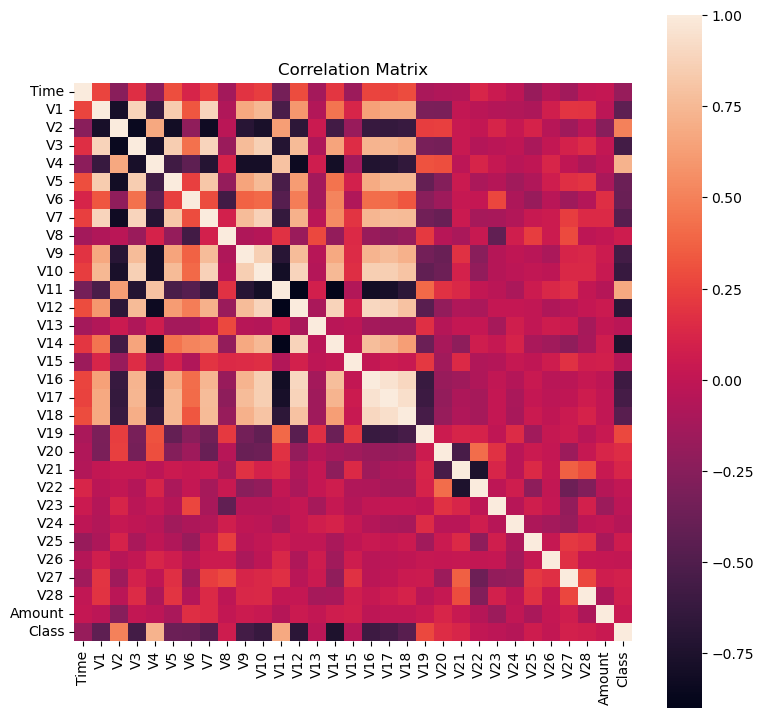

In [37]:
new_corr_matrix = new_data.corr()
fig = plt.figure(figsize=(9, 9))
sns.heatmap(new_corr_matrix, square=True)
plt.title("Correlation Matrix")
plt.show()

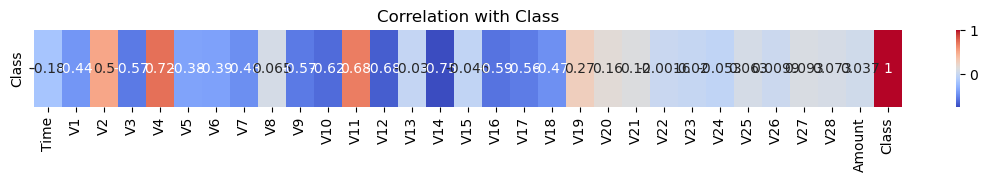

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select correlation of the 'Class' column with other features
class_row = new_corr_matrix.loc[['Class'], :]

# Create the figure with proper dimensions
plt.figure(figsize=(14, 1))  # Height should be small since we're displaying one row

# Plot heatmap
sns.heatmap(class_row, annot=True, cmap='coolwarm', cbar=True)

# Set the title
plt.title('Correlation with Class')

# Display the plot
plt.show()

In [41]:
selected_columns=['V17', 'Class']
data_subset=new_data[selected_columns].head(7)
data_subset['']=data_subset['Class'].map({1:'Fraud', 0: 'Valid'})
print(data_subset)

             V17  Class       
280412  0.064200      0  Valid
95597  -4.186808      1  Fraud
72197  -0.272356      0  Valid
75511  -4.285071      1  Fraud
255556  1.404507      1  Fraud
233688  0.040579      0  Valid
86740   0.455476      0  Valid


In [42]:
selected_columns=['V11', 'Class']
data_subset=new_data[selected_columns].head(7)
data_subset['']=data_subset['Class'].map({1:'Fraud', 0: 'Valid'})
print(data_subset)


             V11  Class       
280412  0.433690      0  Valid
95597   1.277202      1  Fraud
72197  -0.158644      0  Valid
75511   2.338323      1  Fraud
255556  4.469467      1  Fraud
233688 -1.313623      0  Valid
86740  -0.810187      0  Valid


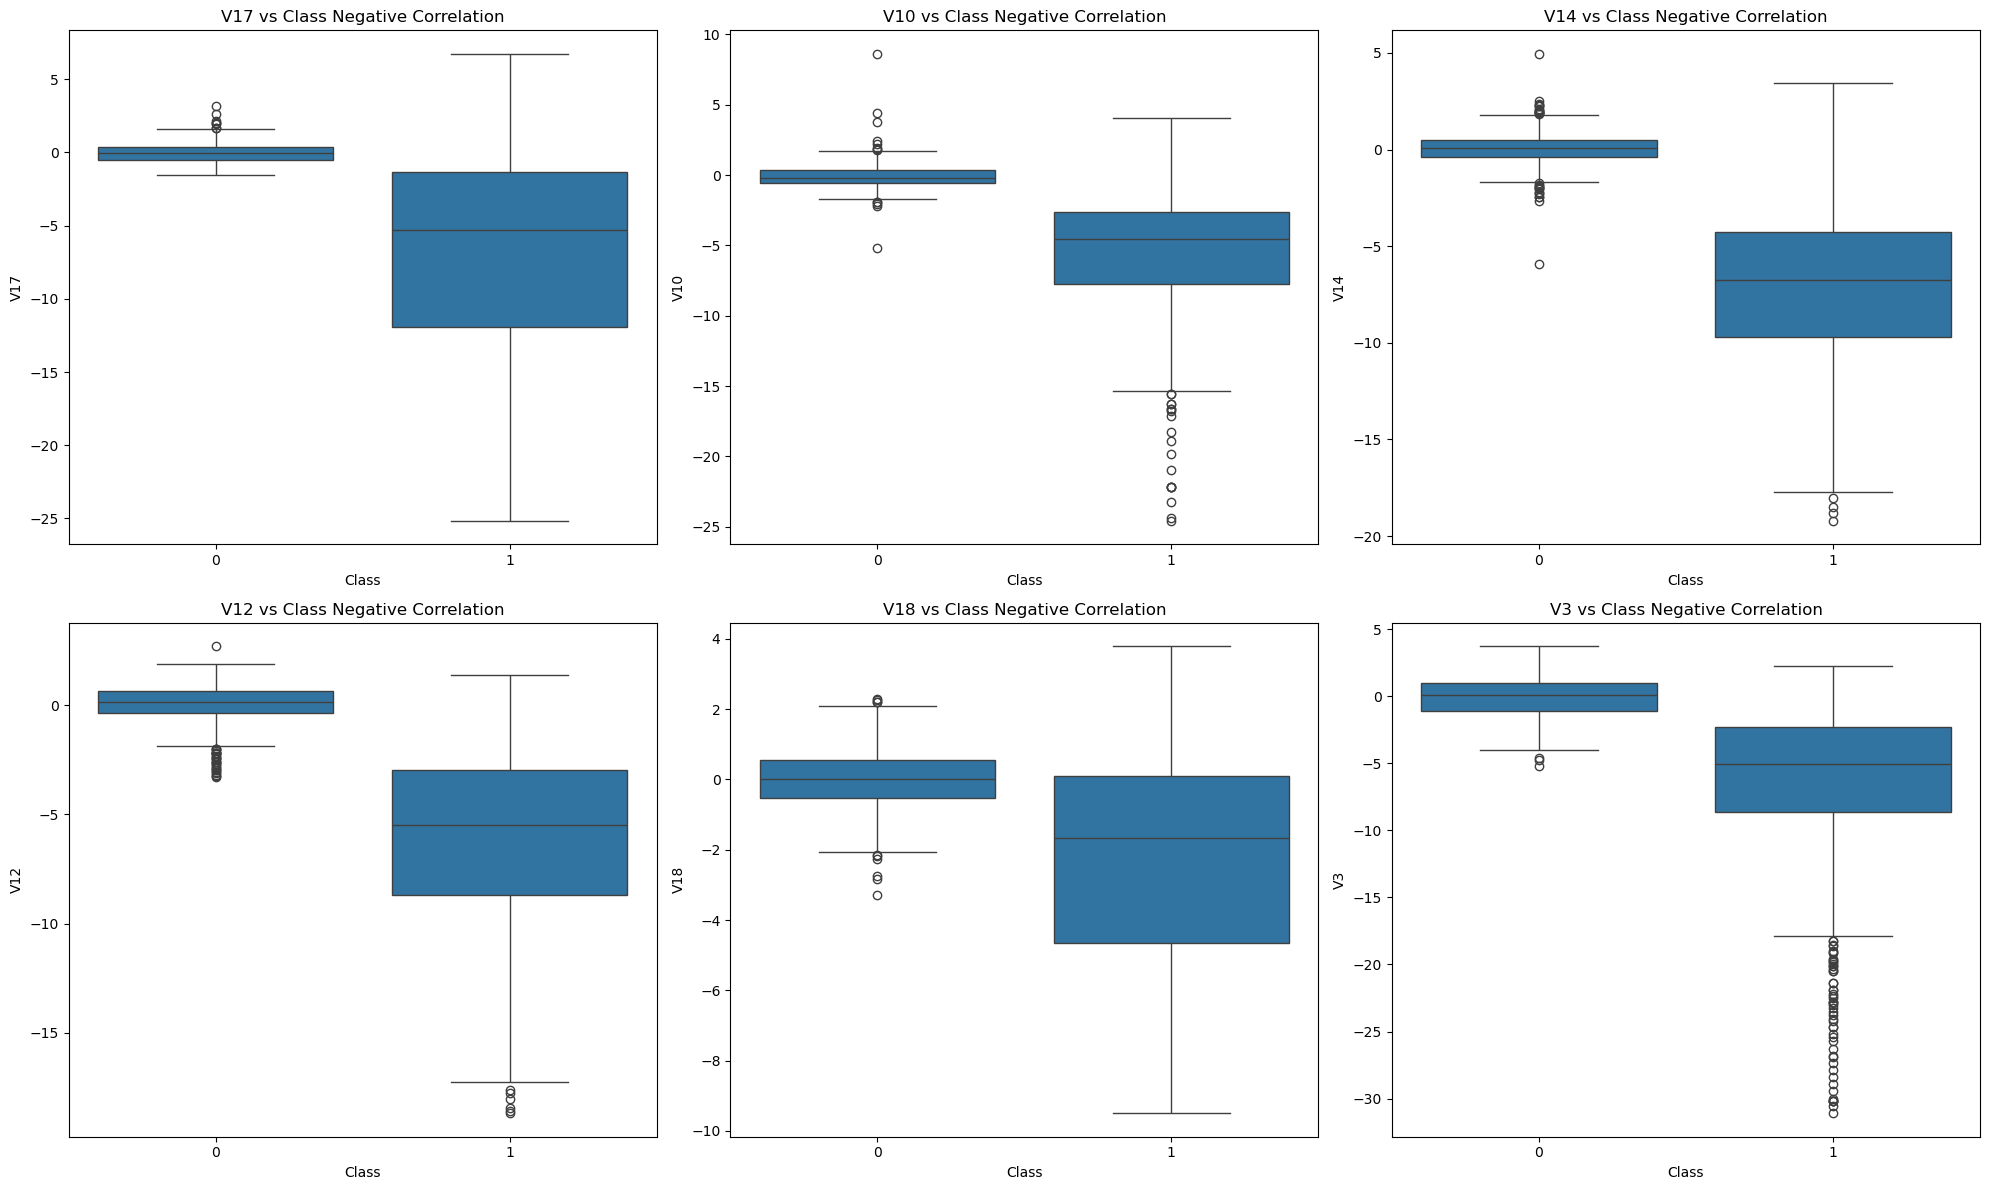

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

#Create subplots
f, axes =plt.subplots(ncols=3, nrows=2, figsize=(20, 12)) # Adjusted figsize for better height

# Plot the boxplots for negative correlations with Class
sns.boxplot(x="Class", y="V17", data=new_data, ax=axes[0][0])
axes[0][0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=new_data, ax=axes[0][1])
axes[0][1].set_title('V10 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=new_data, ax=axes[0][2])
axes[0][2].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=new_data, ax=axes [1][0])
axes[1][0].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V18", data=new_data, ax=axes[1][1])
axes[1][1].set_title('V18 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V3", data=new_data, ax=axes[1][2])
axes[1][2].set_title('V3 vs Class Negative Correlation')

#Display the plot
plt.tight_layout()
plt.show()

In [60]:
import pandas as pd
from scipy.stats import ttest_ind

# Define the target variable and feature columns
target_variable = 'Class'
feature_columns = ['V2', 'V3', 'V4', 'V10', 'V12', 'V14', 'V16', 'V17', 'V19']

#Separate fraud and valid cases based on the target variable
fraud_cases = new_data[new_data[target_variable] == 1]
valid_cases = new_data[new_data[target_variable] == 0]

#Perform hypothesis testing for each feature using a t-test
for column in feature_columns:
    feature_fraud = fraud_cases [column]
    feature_valid = valid_cases [column]
    
    #Perform the t-test
    t_statistic, p_value = ttest_ind(feature_fraud, feature_valid)
    
    #Print results
    print(f'Hypothesis testing results for {column}:')
    print(f'T-statistic: {t_statistic}')
    print(f'P-value: {p_value}')
    
    #Set the significance level
    alpha = 0.00001
    
    #Check if the p-value is less than the significance level
    if p_value < alpha:
        print("There is evidence to reject the null hypothesis.")
        print("There is an association between the feature and the target variable.")
    else:
        print("There is not enough evidence to reject the null hypothesis.")
        print("There is no significant association between the feature and the target variable.")
    
    print('-' * 50)

Hypothesis testing results for V2:
T-statistic: 18.120394414077808
P-value: 1.5659280796829558e-63
There is evidence to reject the null hypothesis.
There is an association between the feature and the target variable.
--------------------------------------------------
Hypothesis testing results for V3:
T-statistic: -21.51671519644184
P-value: 1.9417500592271332e-84
There is evidence to reject the null hypothesis.
There is an association between the feature and the target variable.
--------------------------------------------------
Hypothesis testing results for V4:
T-statistic: 32.61370214485683
P-value: 1.136497934674797e-158
There is evidence to reject the null hypothesis.
There is an association between the feature and the target variable.
--------------------------------------------------
Hypothesis testing results for V10:
T-statistic: -24.957423408166363
P-value: 7.344711193893936e-107
There is evidence to reject the null hypothesis.
There is an association between the feature and

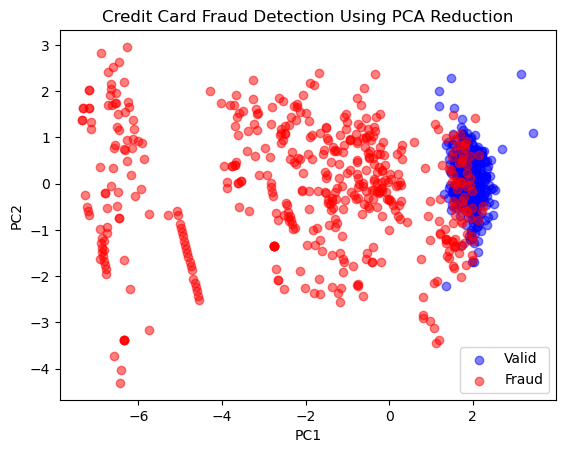

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Define the features you want to use
features = ["V2", "V3", "V4", "V10", "V11", "V12", "V14", "V16", "V17", "V19", "Class"]

#Assuming new df is your dataframe
X = new_data [features].values

# Separate the volid and fraud transactions
valid_transaction =X[X[:, -1]==0] #Valid transactions
fraud_transaction =X[X[:, -1]==1] # Fraud transactions

#Separate the features and class labels
X_features = X[:,:-1] #Features (exclude class)
y = X[:, -1] # Closs labels ( for valid, 1 for froud)

#Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

#Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca= pca.fit_transform(X_scaled)

#Separate the transformed features for valid and fraud transactions
valid_transaction_pca = X_pca[y == 0]
fraud_transaction_pca = X_pca[y == 1]

#Apply DBSCAN clustering to valid transactions
dbscan = DBSCAN(eps=0.5, min_samples=5)
valid_labels = dbscan.fit_predict(valid_transaction_pca)

#Assign -1 Label for froud transactions (assuming outliers in clustering)
fraud_labels = np.full(len(fraud_transaction_pca), -1)

#Plotting the scatter plot
plt.scatter(valid_transaction_pca[:, 0], valid_transaction_pca[:, 1], c='blue', label='Valid', alpha=0.5)
plt.scatter(fraud_transaction_pca[:, 0], fraud_transaction_pca[:,1], c='red', label='Fraud', alpha=0.5)

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Credit Card Fraud Detection Using PCA Reduction')
plt.legend()
plt.show()

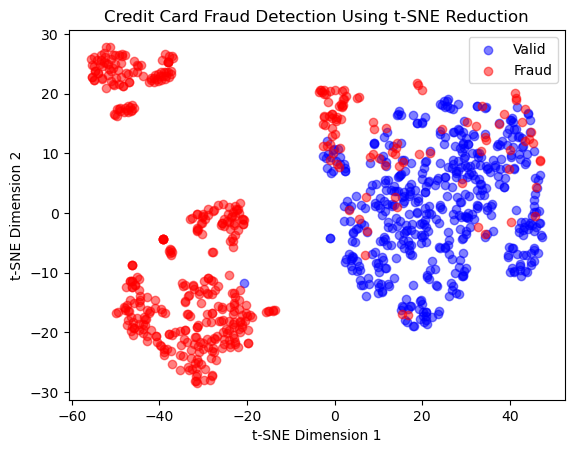

In [102]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Define the features you want to use
features = ["V2", "V3", "V4", "V18", "V11", "V12", "V14", "V16", "V17", "V19", "Class"]

# Assuming 'new_df' is your DataFrame
X = new_data[features].values

# Separate the features and class labels
X_features = X[:, :-1]  # Features (exclude the 'Class' column)
y = X[:, -1]  # Class Labels (0 for valid, 1 for fraud)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_features)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Separate the transformed features for valid and fraud transactions
valid_transactions_tsne = X_tsne[y == 0]
fraud_transactions_tsne = X_tsne[y == 1]

# Apply DBSCAN clustering to valid transactions
dbscan = DBSCAN(eps=0.3, min_samples=5)
valid_labels = dbscan.fit_predict(valid_transactions_tsne)

# Apply DBSCAN clustering to fraud transactions
fraud_labels = np.full(len(fraud_transactions_tsne), -1)  # Assign -1 label for fraud as outliers

# Plotting the scatter plot
plt.scatter(
    valid_transactions_tsne[:, 0], 
    valid_transactions_tsne[:, 1], 
    c='blue', 
    label="Valid", 
    alpha=0.5
)
plt.scatter(
    fraud_transactions_tsne[:, 0], 
    fraud_transactions_tsne[:, 1], 
    c='red', 
    label="Fraud", 
    alpha=0.5
)

plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.title("Credit Card Fraud Detection Using t-SNE Reduction")
plt.legend()
plt.show()


# 